In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from math import sqrt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import KFold


In [2]:
hptraining= pd.read_csv('house_prices_data_training_data.csv')
hptraining

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
hpcomplete= pd.read_csv('house_data_complete.csv')
hpcomplete

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
hpcomplete = hpcomplete.dropna()
hptest= hpcomplete

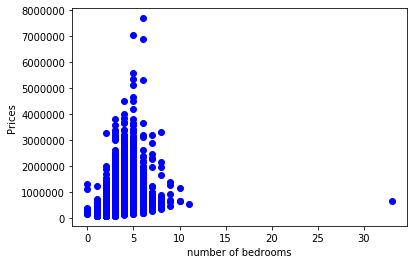

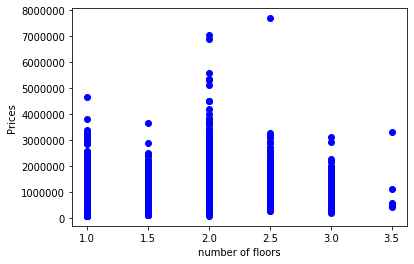

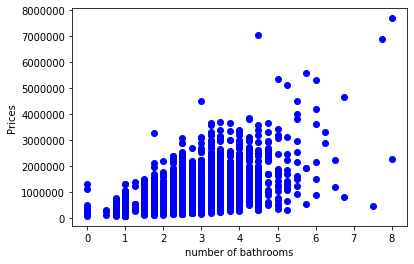

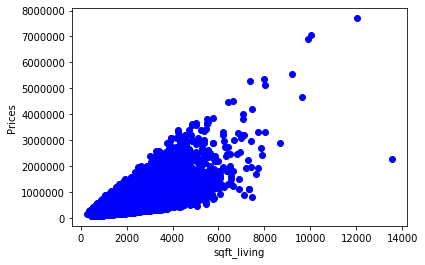

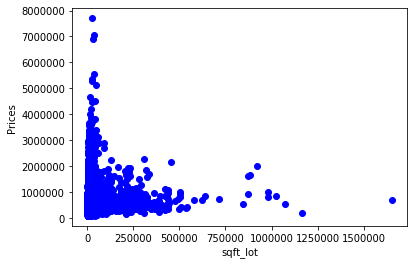

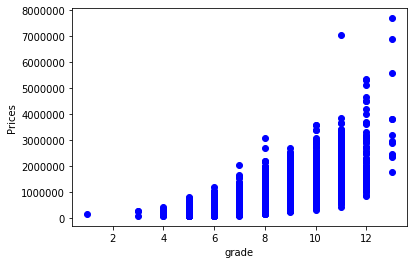

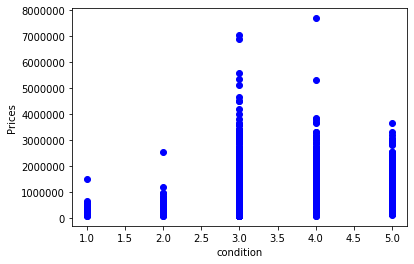

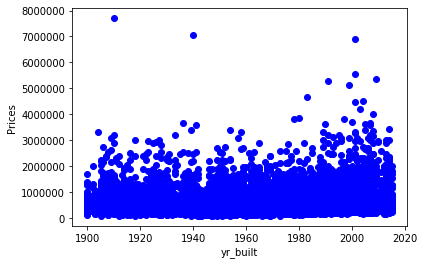

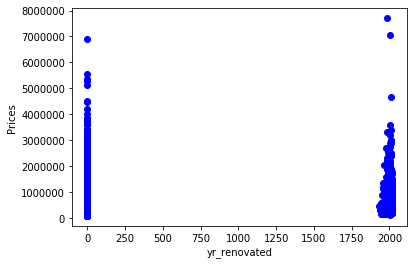

In [5]:
plt.plot(hpcomplete['bedrooms'], hpcomplete['price'], 'bo') 
plt.xlabel('number of bedrooms')
plt.ylabel('Prices')
plt.show()

plt.plot(hpcomplete['floors'], hpcomplete['price'], 'bo') 
plt.xlabel('number of floors')
plt.ylabel('Prices')
plt.show()

plt.plot(hpcomplete['bathrooms'], hpcomplete['price'], 'bo') 
plt.xlabel('number of bathrooms')
plt.ylabel('Prices')
plt.show()


plt.plot(hpcomplete['sqft_living'], hpcomplete['price'], 'bo') 
plt.xlabel('sqft_living')
plt.ylabel('Prices')
plt.show()


plt.plot(hpcomplete['sqft_lot'], hpcomplete['price'], 'bo') 
plt.xlabel('sqft_lot')
plt.ylabel('Prices')
plt.show()


plt.plot(hpcomplete['grade'], hpcomplete['price'], 'bo') 
plt.xlabel('grade')
plt.ylabel('Prices')
plt.show()


plt.plot(hpcomplete['condition'], hpcomplete['price'], 'bo') 
plt.xlabel('condition')
plt.ylabel('Prices')
plt.show()

plt.plot(hpcomplete['yr_built'], hpcomplete['price'], 'bo') 
plt.xlabel('yr_built')
plt.ylabel('Prices')
plt.show()

plt.plot(hpcomplete['yr_renovated'], hpcomplete['price'], 'bo') 
plt.xlabel('yr_renovated')
plt.ylabel('Prices')
plt.show()

In [6]:
hptraining = hptraining.dropna()
hptraining

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,6.414100e+09,20150108T000000,320000.0,2.0,1.00,1802.0,11225.0,1.0,0.0,0.0,...,7.0,1802.0,0.0,1961.0,0.0,98125.0,47.7205,-122.323,1810.0,7332.0
17995,1.346300e+09,20140626T000000,1990000.0,5.0,3.00,4480.0,5000.0,2.5,0.0,0.0,...,12.0,3420.0,1060.0,1902.0,0.0,98112.0,47.6275,-122.315,3220.0,5600.0
17996,2.212210e+09,20140702T000000,253000.0,2.0,1.00,1310.0,7128.0,1.0,0.0,0.0,...,7.0,940.0,370.0,1980.0,0.0,98031.0,47.3958,-122.189,1400.0,7161.0
17997,2.050004e+08,20140915T000000,630000.0,3.0,2.50,2320.0,32772.0,2.0,0.0,0.0,...,9.0,2320.0,0.0,1992.0,0.0,98053.0,47.6304,-121.988,2610.0,33305.0


In [7]:
l= pd.read_csv('house_prices_data_training_data.csv')
l = l.dropna()



In [8]:
l.drop(['price'],axis=1,inplace=True)
l.drop(['date'],axis=1,inplace=True)
l.drop(['id'],axis=1,inplace=True)
l.drop(['waterfront'],axis=1,inplace=True)
l.drop(['view'],axis=1,inplace=True)
l.drop(['zipcode'],axis=1,inplace=True)
l.drop(['sqft_above'],axis=1,inplace=True)
l.drop(['sqft_basement'],axis=1,inplace=True)
l.drop(['lat'],axis=1,inplace=True)
l.drop(['long'],axis=1,inplace=True)
l.drop(['sqft_living15'],axis=1,inplace=True)
l.drop(['sqft_lot15'],axis=1,inplace=True)

Ytest = np.array(hptest['price'])
hptest.drop(['price'],axis=1,inplace=True)
hptest.drop(['date'],axis=1,inplace=True)
hptest.drop(['id'],axis=1,inplace=True)
hptest.drop(['waterfront'],axis=1,inplace=True)
hptest.drop(['view'],axis=1,inplace=True)
hptest.drop(['zipcode'],axis=1,inplace=True)
hptest.drop(['sqft_above'],axis=1,inplace=True)
hptest.drop(['sqft_basement'],axis=1,inplace=True)
hptest.drop(['lat'],axis=1,inplace=True)
hptest.drop(['long'],axis=1,inplace=True)
hptest.drop(['sqft_living15'],axis=1,inplace=True)
hptest.drop(['sqft_lot15'],axis=1,inplace=True)

Ycrossvalidation = Ytest[18000:19001]
Ytest= Ytest[19001:]
Xtest= np.array(hptest)
Xcrossvalidation = Xtest[18000 :19001 , :]
Xtest = Xtest[19001:,:]

In [9]:
l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17999 entries, 0 to 17998
Data columns (total 9 columns):
bedrooms        17999 non-null float64
bathrooms       17999 non-null float64
sqft_living     17999 non-null float64
sqft_lot        17999 non-null float64
floors          17999 non-null float64
condition       17999 non-null float64
grade           17999 non-null float64
yr_built        17999 non-null float64
yr_renovated    17999 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
X= l

In [11]:
X=np.array(X)

In [12]:
prices= hptraining
Y = np.array(prices['price'])

In [13]:
theta =np.ones(10)

In [14]:
Xnorm= np.ones((17999,10))

In [15]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
   
    # ================================================================
    return X_norm, mu, sigma

In [16]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    J=0
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    # ==================================================================
    return J



In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        
        h=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T, h-y)))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

# First Hypothesis

In [18]:
theta = np.ones(10)
Xnorm, mu, sigma= featureNormalize(X)
Xnorm = np.concatenate([np.ones((17999, 1)), Xnorm], axis=1)
alpha = 0.3
num_iters=1500
theta, J_history = gradientDescentMulti(Xnorm, Y, theta, alpha, num_iters)


theta computed from gradient descent: [ 533074.25034724  -43029.15151559   36249.00645691  174836.97824394
   -7980.76182808    4690.35254357   15088.77415736  147911.84609687
 -112537.75384008    9057.15833064]


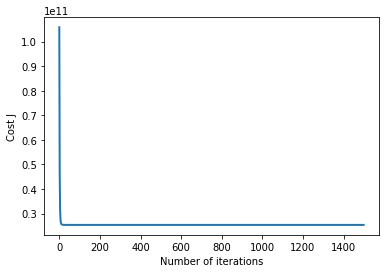

In [19]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [20]:
Xnormcrossvalidation = (Xcrossvalidation-mu)/sigma
Xnormcrossvalidation = np.concatenate([np.ones((1001, 1)), Xnormcrossvalidation], axis=1)
cost = computeCostMulti(Xnormcrossvalidation, Ycrossvalidation, theta)
print('The cost at the cross validation is:',cost)


Xnormtest = (Xtest - mu)/ sigma
Xnormtest = np.concatenate([np.ones((2612, 1)), Xnormtest], axis=1)

cost = computeCostMulti(Xnormtest, Ytest, theta)
print('The cost of the hypothesis is:',cost)

The cost at the cross validation is: 28754674915.917927
The cost of the hypothesis is: 28025656130.050224


# Hypothesis 2


hypothesis2 = 1 + bedrooms^2 + bathrooms^3 + sqft_living^4 + sqft_lot^5 + floors^6 + condition^7 + grade^8 + yr_built^9 
              + yr_renovated^10 

In [21]:
l['bedrooms']=l['bedrooms']**2     
l['bathrooms']=l['bathrooms']**3
l['sqft_living']=l['sqft_living']**4
l['sqft_lot']=l['sqft_lot']**5
l['floors']=l['floors']**6
l['condition']=l['condition']**7
l['grade']=l['grade']**8
l['yr_built']=l['yr_built']**9
l['yr_renovated']=l['yr_renovated']**10

In [22]:
hptest['bedrooms']=hptest['bedrooms']**2     
hptest['bathrooms']=hptest['bathrooms']**3
hptest['sqft_living']=hptest['sqft_living']**4
hptest['sqft_lot']=hptest['sqft_lot']**5
hptest['floors']=hptest['floors']**6
hptest['condition']=hptest['condition']**7
hptest['grade']=hptest['grade']**8
hptest['yr_built']=hptest['yr_built']**9
hptest['yr_renovated']=hptest['yr_renovated']**10

In [23]:
X= np.array(l)

theta = np.ones(10)
Xnorm, mu, sigma= featureNormalize(X)
Xnorm = np.concatenate([np.ones((17999, 1)), Xnorm], axis=1)
alpha = 0.3
num_iters=1500
theta, J_history = gradientDescentMulti(Xnorm, Y, theta, alpha, num_iters)


theta computed from gradient descent: [533074.25034724  17588.15207228 103971.87560422   5828.15111355
   1274.41444572  19510.6095443   27362.00173491 191993.45705408
 -56571.52117479  27573.18245772]


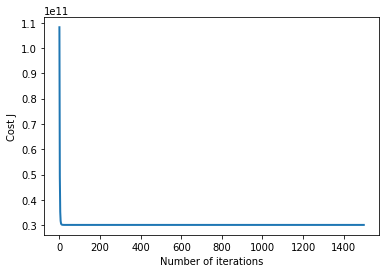

In [24]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [25]:
Xtest= np.array(hptest)
Xcrossvalidation = Xtest[18000 :19001 , :]
Xtest = Xtest[19001:,:]


Xnormcrossvalidation = (Xcrossvalidation-mu)/sigma
Xnormcrossvalidation = np.concatenate([np.ones((1001, 1)), Xnormcrossvalidation], axis=1)
cost = computeCostMulti(Xnormcrossvalidation, Ycrossvalidation, theta)
print('The cost at the cross validation is:',cost)


Xnormtest = (Xtest - mu)/ sigma
Xnormtest = np.concatenate([np.ones((2612, 1)), Xnormtest], axis=1)

cost = computeCostMulti(Xnormtest, Ytest, theta)
print('The cost of the hypothesis is:',cost)

The cost at the cross validation is: 128140468336.12402
The cost of the hypothesis is: 150844892592.93765


# Hypothesis 3


hypothesis2 = 1 + bedrooms^2 + bathrooms^3 + sqft_living^4 + sqft_lot^5 

In [26]:
l.drop(['floors'],axis=1,inplace=True)
l.drop(['condition'],axis=1,inplace=True)
l.drop(['grade'],axis=1,inplace=True)
l.drop(['yr_built'],axis=1,inplace=True)
l.drop(['yr_renovated'],axis=1,inplace=True)


hptest.drop(['floors'],axis=1,inplace=True)
hptest.drop(['condition'],axis=1,inplace=True)
hptest.drop(['grade'],axis=1,inplace=True)
hptest.drop(['yr_built'],axis=1,inplace=True)
hptest.drop(['yr_renovated'],axis=1,inplace=True)

In [27]:
X= np.array(l)

theta = np.ones(5)
Xnorm, mu, sigma= featureNormalize(X)
Xnorm = np.concatenate([np.ones((17999, 1)), Xnorm], axis=1)
alpha = 0.3
num_iters=1500
theta, J_history = gradientDescentMulti(Xnorm, Y, theta, alpha, num_iters)


theta computed from gradient descent: [533074.25034724  17312.35940974 175562.51548448  47779.27294329
   2619.54353408]


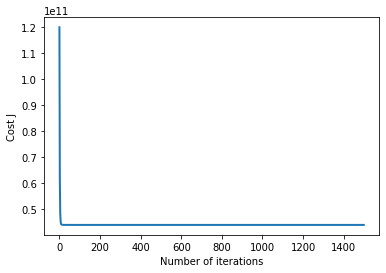

In [28]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [30]:
Xtest= np.array(hptest)
Xcrossvalidation = Xtest[18000 :19001 , :]
Xtest = Xtest[19001:,:]

Xnormcrossvalidation = (Xcrossvalidation-mu)/sigma
Xnormcrossvalidation = np.concatenate([np.ones((1001, 1)), Xnormcrossvalidation], axis=1)
cost = computeCostMulti(Xnormcrossvalidation, Ycrossvalidation, theta)
print('The cost at the cross validation is:',cost)


Xnormtest = (Xtest - mu)/ sigma
Xnormtest = np.concatenate([np.ones((2612, 1)), Xnormtest], axis=1)

cost = computeCostMulti(Xnormtest, Ytest, theta)
print('The cost of the hypothesis is:',cost)

The cost at the cross validation is: 51703422602.60312
The cost of the hypothesis is: 45460168638.947914


# KFold For The First Hypothesis

In [31]:
hpcomplete= pd.read_csv('house_data_complete.csv')
hpcomplete = hpcomplete.dropna()
Y = np.array(hpcomplete['price'])
hpcomplete.drop(['price'],axis=1,inplace=True)
hpcomplete.drop(['date'],axis=1,inplace=True)
hpcomplete.drop(['id'],axis=1,inplace=True)
hpcomplete.drop(['waterfront'],axis=1,inplace=True)
hpcomplete.drop(['view'],axis=1,inplace=True)
hpcomplete.drop(['zipcode'],axis=1,inplace=True)
hpcomplete.drop(['sqft_above'],axis=1,inplace=True)
hpcomplete.drop(['sqft_basement'],axis=1,inplace=True)
hpcomplete.drop(['lat'],axis=1,inplace=True)
hpcomplete.drop(['long'],axis=1,inplace=True)
hpcomplete.drop(['sqft_living15'],axis=1,inplace=True)
hpcomplete.drop(['sqft_lot15'],axis=1,inplace=True)
X = np.array(hpcomplete)

In [32]:
kf = KFold(3)
for train_index, test_index in kf.split(X):
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    theta = np.ones(10)
    Xnorm, mu, sigma= featureNormalize(Xtrain)
    Xnorm = np.concatenate([np.ones((Ytrain.size, 1)), Xnorm], axis=1)
    alpha = 0.3
    num_iters=1500
    theta, J_history = gradientDescentMulti(Xnorm, Ytrain, theta, alpha, num_iters)
    Xnormtest = (Xtest-mu)/sigma
    Xnormtest = np.concatenate([np.ones((Ytest.size, 1)), Xnormtest], axis=1)
    cost = computeCostMulti(Xnormtest, Ytest, theta)
    print('The cost of the hypothesis is:',cost)
    

The cost of the hypothesis is: 27496949708.71162
The cost of the hypothesis is: 24863060430.31567
The cost of the hypothesis is: 25595313861.221905
